<a href="https://colab.research.google.com/github/Nihmat-git/First-Project/blob/main/First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STUTERN DATA SCIENCE BEGINNERS PROJECT

BY NIHMAT AMINU



*   A PROJECT ON IBM EMPLOYEE ATTRITION



**DATASET CAN BE FOUND** [HERE](https://drive.google.com/file/d/13cdx4kWB6-WZe1VTjPqnFRgYzzGZHt2x/view?usp=sharing)

 PROJECT ADDRESSED TO STUTERN DATA SCIENCE TEAM

## PROJECT OVERVIEW


*   Factors behind employee attrition
*   Relationship between variables


*   Effects of variables on Attrition







## Setting up workspace
*  Firstly,  import necessary libraries to work on dataset 




In [ ]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns



*   Then, connect to a database and create a cursor object to allow execution of SQL queries

In [ ]:
# connect to a database

conn = sqlite3.connect('attr_data.db')

In [ ]:
# create a cursor to enable data manipulation
cursor = conn.cursor()


*   Display information contained in the 'attrition_records' dataset




In [ ]:
sql_query = """SELECT * FROM attrition_records"""


In [ ]:
# Execute
result = cursor.execute(sql_query)

# Display result
result.fetchall()

[(1,
  41,
  'Yes',
  'Travel_Rarely',
  1102,
  'Sales',
  1,
  2,
  'Life Sciences',
  1,
  1,
  2,
  'Female',
  94,
  3,
  2,
  'Sales Executive',
  4,
  'Single',
  5993,
  19479,
  8,
  'Y',
  'Yes',
  11,
  3,
  1,
  80,
  0,
  8,
  0,
  1,
  6,
  4,
  0,
  5),
 (2,
  49,
  'No',
  'Travel_Frequently',
  279,
  'Research & Development',
  8,
  1,
  'Life Sciences',
  1,
  2,
  3,
  'Male',
  61,
  2,
  2,
  'Research Scientist',
  2,
  'Married',
  5130,
  24907,
  1,
  'Y',
  'No',
  23,
  4,
  4,
  80,
  1,
  10,
  3,
  3,
  10,
  7,
  1,
  7),
 (3,
  37,
  'Yes',
  'Travel_Rarely',
  1373,
  'Research & Development',
  2,
  2,
  'Other',
  1,
  4,
  4,
  'Male',
  92,
  2,
  1,
  'Laboratory Technician',
  3,
  'Single',
  2090,
  2396,
  6,
  'Y',
  'Yes',
  15,
  3,
  2,
  80,
  0,
  7,
  3,
  3,
  0,
  0,
  0,
  0),
 (4,
  33,
  'No',
  'Travel_Frequently',
  1392,
  'Research & Development',
  3,
  4,
  'Life Sciences',
  1,
  5,
  4,
  'Female',
  56,
  3,
  1,
  'Resear

*  Reading the database with pandas


In [ ]:
df = pd.read_sql_query(sql_query, conn)

# display head of dataset (i.e the first five rows)
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# display shape of dataset

df.shape

(1470, 36)

In [ ]:
# describe dataset

df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##**Question 1**


**Three factors behind employee attrition **


Employees attrition is of two variables, 'Yes' and 'No'. Here's to check out factors behind the employees' attrition with their job

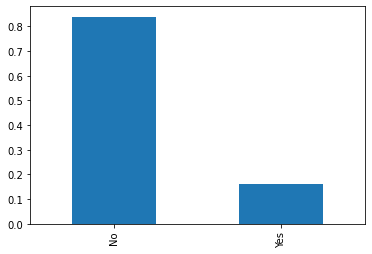

In [ ]:
# Calculate attrition rate of the company

attrition_rate = df.Attrition.value_counts() / df.shape[0]
attrition_rate.plot.bar()

In [ ]:
# Display the mean of the attrition rate of the company, to remark the group difference

attrition_mean = df.groupby('Attrition')
attrition_mean.mean().T

Attrition,No,Yes
id,737.429035,725.464135
Age,37.561233,33.607595
DailyRate,812.504461,750.362869
DistanceFromHome,8.915653,10.632911
Education,2.927007,2.839662
EmployeeCount,1.000000,1.000000
EmployeeNumber,1027.656123,1010.345992
EnvironmentSatisfaction,2.771290,2.464135
HourlyRate,65.952149,65.573840
JobInvolvement,2.770479,2.518987


## HEATMAP

Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. 



In [ ]:
# Get correlations in the dataset

corr = df.corr()

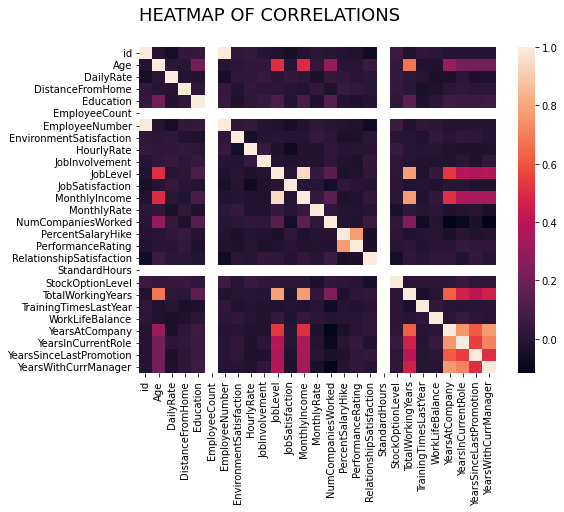

In [ ]:
# Generate heatmap of correlations

plt.figure(figsize=(8,6))
sns.heatmap(corr)
plt.title("Heatmap of correlations \n".upper(), fontdict={'fontsize': 18}, loc='left')
plt.show()



* According to the heatmap displayed above, the most apparent three factors behind employee attrition are:
(1) Job level 
(2) Monthly income, and
(3) Percent salary hike   




## Question 2
What is the relationship between Education and Monthly Income?



*   To find relationship between two variables, a scatterplot comes very handy.
*   A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.





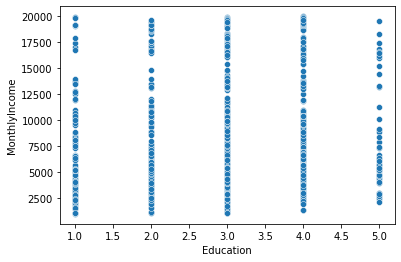

In [ ]:
# plot a scatterplot to display relationship between the two variables
sns.scatterplot(x=df['Education'], y=df['MonthlyIncome'])
plt.show()

In [ ]:
# Check the correlations coefficient between the two variables; Education and Monthly Income
df['Education'].corr(df['MonthlyIncome'])
Output: 0.8087835060658337



*   When a scatterplot appears vertical, it indicates that knowing the value of one variable will not enable us to predict the value of the other variable. We can therefore conclude that when a scatterplot has a vertical line as displayed in the above plot, there is no correlation between the two variables. Hence, there is no relationship between 'Education' and 'Monthly Income'.



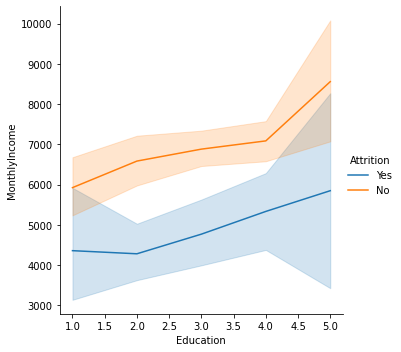

In [ ]:
# Visualization of relationship between the variables with relplot    (The Seaborn Relational Plot (relplot) allows us to visualise how variables within a dataset relate to each other.)

sns.relplot(x="Education", y="MonthlyIncome", hue='Attrition', kind="line", data=df);


## Question 3
What is the effect of age on attrition?



**Catplot** 

* A Catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables.   



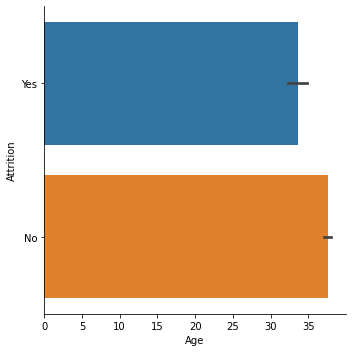

In [ ]:
# Using catplot to compare Age and Attrition

sns.catplot(x="Age", y="Attrition", kind='bar', data=df)



*    Here, it is seen that the bar for 'No' of attrition is higher than that of 'Yes' of attrition. Hence, Age has more of a lesser effect on attrition.




## Question 4
Is Income the main factor in employee attrition?





* According to the output of Question 1 in this project, the main factors affecting employee attrition are 'MonthlyIncome', 'JobLevel', and 'PercentSalaryHike. To find out if employee income is the main factor, the three factors have to be plotted to find out.  




In [ ]:
# Display monthlyincome column

df.MonthlyIncome

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [ ]:
# Display joblevel column

df.JobLevel

0       2
1       2
2       1
3       1
4       1
       ..
1465    2
1466    3
1467    2
1468    2
1469    2
Name: JobLevel, Length: 1470, dtype: int64

In [ ]:
# Display percentsalaryhike column

df.PercentSalaryHike


0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: PercentSalaryHike, Length: 1470, dtype: int64

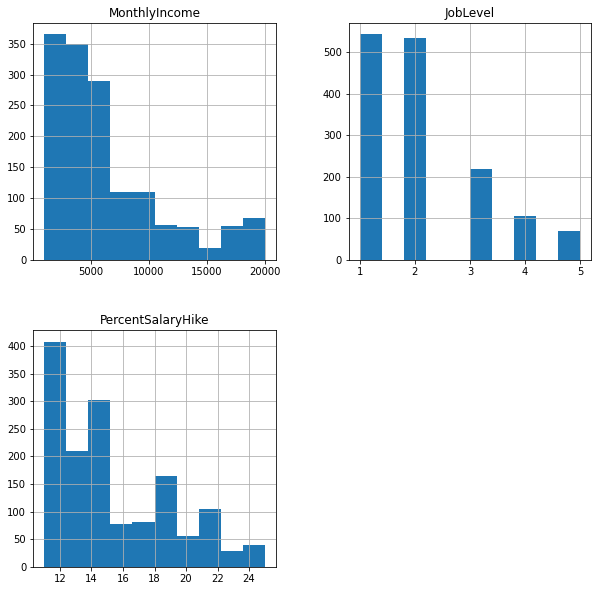

In [ ]:
# create a list containing the three columns

features = ['MonthlyIncome', 'JobLevel', 'PercentSalaryHike'] 
df[features].hist(figsize=(10,10));



*   **Barplot**



*  A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value. 
  



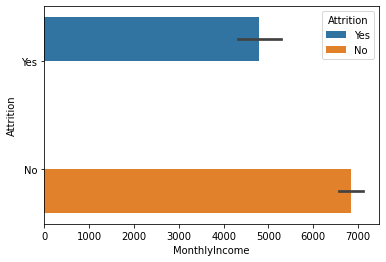

In [ ]:
# columns to plot
cols_to_plot = ['MonthlyIncome', 'JobLevel', 'PercentSalaryHike', 'Attrition']

# plotting a barplot to visualize effect of monthlyincome in Attrition

sns.barplot(data=df, x="MonthlyIncome", y="Attrition", hue="Attrition")

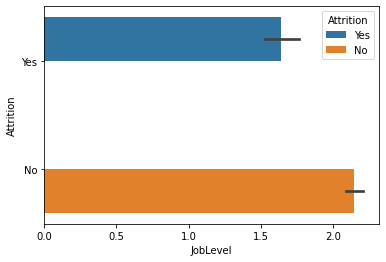

In [ ]:
# plotting a barplot to visualize effect of Joblevel in Attrition

sns.barplot(x="JobLevel", y="Attrition", hue="Attrition", data=df);

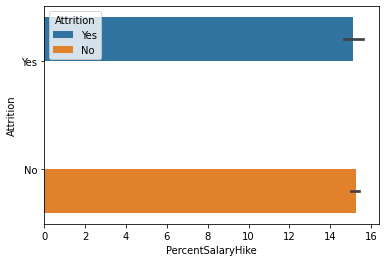

In [ ]:
# plotting a barplot to visualize effect of Percentsalaryhike in Attrition

sns.barplot(x="PercentSalaryHike", y="Attrition", hue="Attrition", data=df);




*  Studying the above bar plots
displayed above, it is observed that 'MonthlyIncome' isn't the main factor affecting employee attrition. Rather, it is 'PercentSalaryHike'.

*   Hence,  income is not the main factor in employee attrition 


 




## Question 5

How does work-life balance impact the overall attrition rate?


In [ ]:
# Display worklifebalance column

df.WorkLifeBalance

0       1
1       3
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    3
1468    2
1469    4
Name: WorkLifeBalance, Length: 1470, dtype: int64

In [ ]:
# Calculate attrition rate of the company

attrition_rate = df.Attrition.value_counts() / df.shape[0]

In [ ]:
print(attrition_rate)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


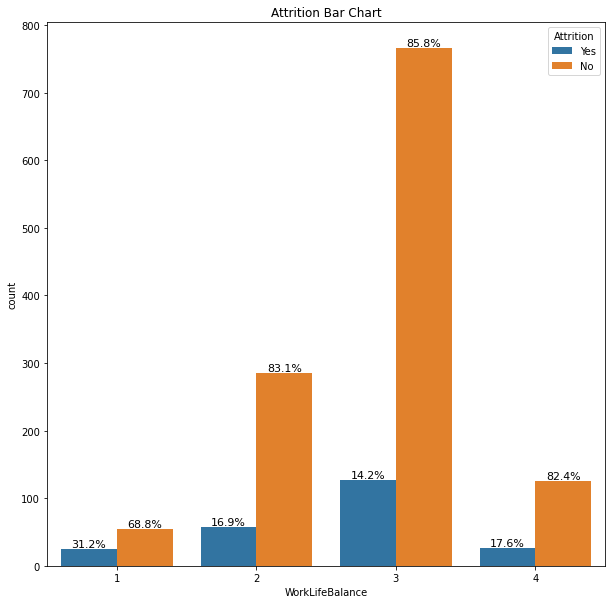

In [ ]:
def show_percentage(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

fig=plt.figure(figsize=(10,10))
ax=sns.countplot(data=df,x="WorkLifeBalance", hue = "Attrition")
plt.title("Attrition Bar Chart")
show_percentage(ax)
plt.show()

*   WorkLifeBalance has little impact on attrition rate. 




## ***References***



1.   https://seaborn.pydata.org/tutorial/relational.html
2.   https://www.geeksforgeeks.org/python-seaborn-catplot/
3. https://colab.research.google.com/drive/1RYZFiZtqY_XNRzkYEq40-wMb29f-4m1d?usp=sharing#scrollTo=pT9as-xLXOlT

1. https://docs.google.com/presentation/d/1tbs7kCOqB0HnC6u64R02OO_HYSDtqdS_SX71w2scW6Y/edit#slide=id.g138189d633e_0_81  
2.   https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e



